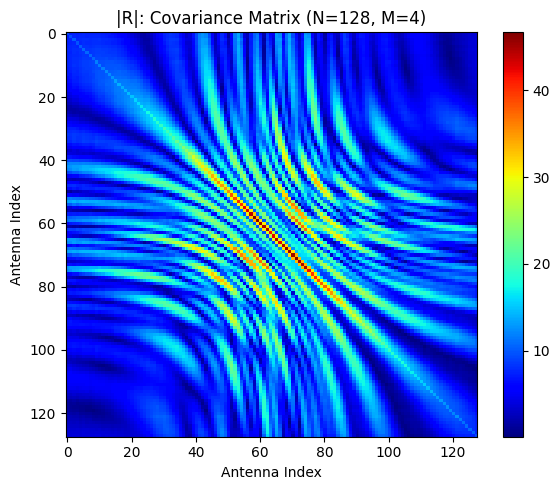

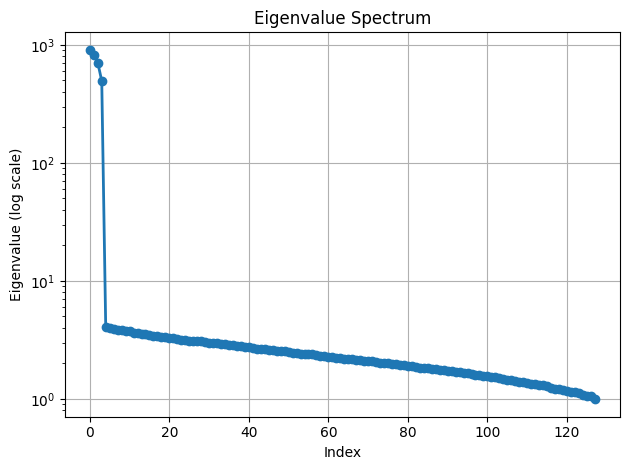

array([909.72014259, 827.40955417, 707.25120048, 495.57843314,
         4.07568184,   4.01966363,   3.87849046,   3.8453473 ,
         3.79629978,   3.77207125])

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# ======= Parameters =======
fc = 10e9  # Carrier frequency (Hz)
c = 3e8  # Speed of light (m/s)
lambda_c = c / fc  # Wavelength (m)
d = 0.5 * lambda_c  # Antenna spacing
N = 128  # Number of antennas
M = 4  # Number of scatterers
T = 1000  # Number of snapshots
snr_dB = 10  # SNR in dB
snr = 10 ** (snr_dB / 10)  # SNR linear scale

# ======= Scatterer Setup =======
r_min = 0.3
r_max = 0.5
r_scatter = r_min + (r_max - r_min) * np.random.rand(M)
theta_center = 0
angle_spread = 20
theta_deg = theta_center + angle_spread * (2 * np.random.rand(M) - 1)
theta_rad = np.deg2rad(theta_deg)

# ======= Antenna Grid =======
n = np.arange(N)
x_n = (n - N / 2) * d

# ======= Channel Matrix H (N x M) =======
H = np.zeros((N, M), dtype=complex)
for m in range(M):
    for i in range(N):
        r_mn = np.sqrt(r_scatter[m] ** 2 + x_n[i] ** 2 -
                       2 * r_scatter[m] * x_n[i] * np.sin(theta_rad[m]))
        phase = -2 * np.pi * fc * r_mn / c
        H[i, m] = (1 / r_mn) * np.exp(1j * phase)

# ======= Transmit QPSK Symbols (M x T) =======
x = (2 * np.random.randint(0, 2, (M, T)) - 1) + \
    1j * (2 * np.random.randint(0, 2, (M, T)) - 1)

# ======= Received Signal Y = Hx + noise =======
Y_clean = H @ x
signal_power = np.mean(np.abs(Y_clean) ** 2)
noise_power = signal_power / snr
noise = np.sqrt(noise_power / 2) * (np.random.randn(N, T) + 1j * np.random.randn(N, T))
Y = Y_clean + noise

# ======= Sample Covariance Matrix =======
R = (1 / T) * (Y @ Y.conj().T)

# ======= Plot Covariance Matrix =======
plt.figure(figsize=(6, 5))
plt.imshow(np.abs(R), cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f"|R|: Covariance Matrix (N={N}, M={M})")
plt.xlabel("Antenna Index")
plt.ylabel("Antenna Index")
plt.tight_layout()
plt.show()

# ======= Plot Eigenvalue Spectrum =======
e_vals = np.sort(np.real(np.linalg.eigvals(R)))[::-1]
plt.figure()
plt.semilogy(e_vals, 'o-', linewidth=2)
plt.xlabel("Index")
plt.ylabel("Eigenvalue (log scale)")
plt.title("Eigenvalue Spectrum")
plt.grid(True)
plt.tight_layout()
plt.show()

# ======= Display Top Eigenvalues =======
top_eigenvalues = e_vals[:min(10, len(e_vals))]
top_eigenvalues


In [27]:
# from qiskit import QuantumCircuit
# from qiskit.circuit.library import TwoLocal
# from qiskit.quantum_info import Statevector,Operator,SparsePauliOp
# from qiskit.primitives import StatevectorSampler,StatevectorEstimator
# from scipy.optimize import minimize
# import numpy as np
# import matplotlib.pyplot as plt
#
# from qiskit_addon_cutting.utils.observable_grouping import ObservableCollection
# qubits = np.log2(N)
# print(qubits)
# H_matrix = R
#
# # Step 2: Convert to Pauli operator
# op = Operator(H_matrix)
# pauli_op = SparsePauliOp.from_operator(op)
#
# # Step 3: Filter local Pauli terms
# def is_local(pauli_str, max_distance):
#     indices = [i for i, p in enumerate(pauli_str) if p != 'I']
#     if len(indices) <= 1:
#         return True
#     return max(indices) - min(indices) <= max_distance
#
# filtered_labels = []
# filtered_coeffs = []
#
# for coeff, label in zip(pauli_op.coeffs, pauli_op.paulis.to_labels()):
#     if is_local(label, max_distance=qubits-2):  # Nearest-neighbor locality
#         filtered_labels.append(label)
#         filtered_coeffs.append(coeff)
#
# # Step 4: Rebuild operator
# filtered_op = SparsePauliOp.from_list(list(zip(filtered_labels, filtered_coeffs)))
# filtered_matrix = filtered_op.to_operator().data
#
# # Step 5: Compute eigenvalues
# eigvals_full = np.linalg.eigvalsh(H_matrix)
# eigvals_local = np.linalg.eigvalsh(filtered_matrix)
# eig_org=np.linalg.eigvalsh(R)
#
# print("🔹 Original Hamiltonian Eigenvalues:")
# print(np.round(eig_org, 4))
#
# print("🔹 Full Hamiltonian Eigenvalues:")
# print(np.round(eigvals_full, 4))
#
# print("\n🔹 Local (banded) Pauli Hamiltonian Eigenvalues:")
# print(np.round(eigvals_local, 4))
#


7.0
🔹 Original Hamiltonian Eigenvalues:
[  0.9916   1.0481   1.0663   1.0877   1.1147   1.1396   1.1531   1.1748
   1.1884   1.2098   1.2202   1.245    1.2763   1.3005   1.3051   1.331
   1.3397   1.3602   1.3759   1.3986   1.4167   1.441    1.4572   1.4739
   1.508    1.5178   1.5339   1.5513   1.5659   1.5817   1.6019   1.622
   1.645    1.664    1.6873   1.7012   1.7107   1.7247   1.7481   1.769
   1.7881   1.8044   1.8187   1.8355   1.8422   1.8741   1.882    1.9065
   1.9325   1.9464   1.9635   1.9878   2.0006   2.0142   2.0267   2.0409
   2.077    2.0839   2.1086   2.1221   2.1431   2.1639   2.1769   2.1968
   2.2187   2.2368   2.2634   2.2755   2.295    2.3105   2.3498   2.3804
   2.3922   2.4038   2.4165   2.4456   2.4593   2.4878   2.5226   2.5359
   2.5633   2.5801   2.6118   2.6269   2.6486   2.6639   2.7147   2.728
   2.7668   2.7868   2.8226   2.8395   2.8677   2.8886   2.9377   2.948
   2.9787   2.9938   3.0163   3.0654   3.0689   3.1012   3.1213   3.1565
   3.171    3.22

In [28]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

from qiskit_addon_cutting.utils.observable_grouping import ObservableCollection

# === Step 1: Convert covariance matrix to SparsePauliOp ===
qubits = int(np.log2(N))  # Ensure integer
print("Number of qubits:", qubits)

H_matrix = R

# Step 2: Convert to Pauli operator
op = Operator(H_matrix)
pauli_op = SparsePauliOp.from_operator(op)

# Step 3: Filter local Pauli terms by Pauli weight (k-local)
# Step 2: Set coefficient threshold (tune this!)
min_coeff_magnitude = 5*1e-1  # Keep only significant Pauli terms

# Step 3: Filter based on coefficient magnitude
filtered_labels = []
filtered_coeffs = []

for coeff, label in zip(pauli_op.coeffs, pauli_op.paulis.to_labels()):
    if abs(coeff) >= min_coeff_magnitude:
        filtered_labels.append(label)
        filtered_coeffs.append(coeff)

# Step 4: Rebuild SparsePauliOp
filtered_op = SparsePauliOp.from_list(list(zip(filtered_labels, filtered_coeffs)))
filtered_matrix = filtered_op.to_operator().data

# Step 5: Compute eigenvalues
eigvals_full = np.linalg.eigvalsh(H_matrix)
eigvals_local = np.linalg.eigvalsh(filtered_matrix)
eig_org = np.linalg.eigvalsh(R)

print("🔹 Original Hamiltonian Eigenvalues:")
print(np.round(eig_org, 4))

print("🔹 Full Hamiltonian Eigenvalues:")
print(np.round(eigvals_full, 4))

print("\n🔹 Local (≤2-local) Pauli Hamiltonian Eigenvalues:")
print(np.round(eigvals_local, 4))


Number of qubits: 7
🔹 Original Hamiltonian Eigenvalues:
[  0.9916   1.0481   1.0663   1.0877   1.1147   1.1396   1.1531   1.1748
   1.1884   1.2098   1.2202   1.245    1.2763   1.3005   1.3051   1.331
   1.3397   1.3602   1.3759   1.3986   1.4167   1.441    1.4572   1.4739
   1.508    1.5178   1.5339   1.5513   1.5659   1.5817   1.6019   1.622
   1.645    1.664    1.6873   1.7012   1.7107   1.7247   1.7481   1.769
   1.7881   1.8044   1.8187   1.8355   1.8422   1.8741   1.882    1.9065
   1.9325   1.9464   1.9635   1.9878   2.0006   2.0142   2.0267   2.0409
   2.077    2.0839   2.1086   2.1221   2.1431   2.1639   2.1769   2.1968
   2.2187   2.2368   2.2634   2.2755   2.295    2.3105   2.3498   2.3804
   2.3922   2.4038   2.4165   2.4456   2.4593   2.4878   2.5226   2.5359
   2.5633   2.5801   2.6118   2.6269   2.6486   2.6639   2.7147   2.728
   2.7668   2.7868   2.8226   2.8395   2.8677   2.8886   2.9377   2.948
   2.9787   2.9938   3.0163   3.0654   3.0689   3.1012   3.1213   3.1565


In [29]:
total_terms = len(pauli_op)
local_terms = len(filtered_op)
avoided_terms = total_terms - local_terms
percent_reduced = 100 * avoided_terms / total_terms

print(f"\n🔸 Total Pauli terms in full H: {total_terms}")
print(f"🔸 Local Pauli terms kept     : {local_terms}")
print(f"🔸 Pauli terms avoided        : {avoided_terms} ({percent_reduced:.2f}%)")


🔸 Total Pauli terms in full H: 16383
🔸 Local Pauli terms kept     : 9185
🔸 Pauli terms avoided        : 7198 (43.94%)


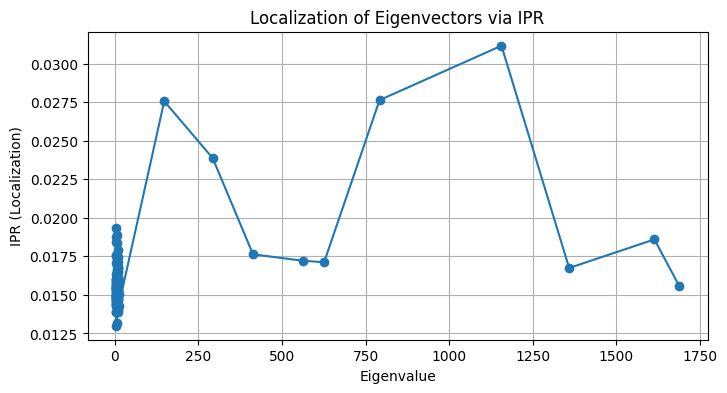

In [13]:
def compute_ipr(eigenvectors):
    """
    Compute Inverse Participation Ratio (IPR) for each eigenvector.

    Parameters:
        eigenvectors (np.ndarray): Matrix with eigenvectors as columns.

    Returns:
        np.ndarray: IPR values (real).
    """
    ipr = []
    for v in eigenvectors.T:  # eigenvectors are columns
        norm = np.linalg.norm(v)
        if norm == 0:
            ipr.append(0)
        else:
            v_normalized = v / norm
            ipr_val = np.sum(np.abs(v_normalized) ** 4)
            ipr.append(np.real_if_close(ipr_val))  # remove tiny imaginary part
    return np.array(ipr)

# Example: Random symmetric matrix (can replace with your banded matrix)


# Eigen decomposition
eigvals, eigvecs = np.linalg.eigh(R)

# Compute IPR
ipr_values = compute_ipr(eigvecs)

# Plot IPR
plt.figure(figsize=(8, 4))
plt.plot(eigvals, ipr_values, 'o-')
plt.xlabel('Eigenvalue')
plt.ylabel('IPR (Localization)')
plt.title('Localization of Eigenvectors via IPR')
plt.grid(True)
plt.show()